In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from sklearn.model_selection import train_test_split
warnings.simplefilter("ignore")

In [2]:
grp_orng=pd.read_csv('../../data/citrus.csv')

In [3]:
grp_orng.head()


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
grp_orng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [5]:
grp_orng.dropna()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [6]:
grp_orng.weight.unique()

array([ 86.76,  88.05,  95.17, ..., 256.5 , 260.14, 261.51])

In [7]:
grp_orng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [8]:
#Multicollinearity 
grp_orng.iloc[:,[1,2,3,4]].corr()

,diameter,weight,red,green
diameter,1.000000,0.999476,-0.217821,-0.396832
weight,0.999476,1.000000,-0.214714,-0.392003
red,-0.217821,-0.214714,1.000000,0.148937
green,-0.396832,-0.392003,0.148937,1.000000


In [9]:
grp_orng['Binary_value']=grp_orng['name'].replace({'orange':0,'grapefruit':1})

In [10]:
res=sm.GLM.from_formula('name~diameter+red+green+blue',family=sm.families.Binomial(),data=grp_orng).fit() #weight 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['name[grapefruit]', 'name[orange]']   No. Observations:                10000
Model:                                              GLM   Df Residuals:                     9995
Model Family:                                  Binomial   Df Model:                            4
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -1715.6
Date:                                  Sat, 26 Dec 2020   Deviance:                       3431.2
Time:                                          14:47:14   Pearson chi2:                 7.98e+03
No. Iterations:                                       8                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2118      0.845     -3.800      0.000      -4.868      -1.555
diameter       1.9925      0.050     39.971      0.000       1.895       2.090
red           -0.0601      0.005    -13.242      0.000      -0.069      -0.051
green         -0.1166      0.005    -24.213      0.000      -0.126      -0.107
blue           0.1303      0.006     22.142      0.000       0.119       0.142
==============================================================================
"""

In [11]:
grp_orng['pre_binary']=0 
for i in range(len(res.predict())):
        if(res.predict()[i]<0.5):
            grp_orng['pre_binary'][i]='orange'
        else:
            grp_orng['pre_binary'][i]='grapefruit'
            

In [12]:
grp_orng['pre_binary']

0           orange
1           orange
2           orange
3           orange
4           orange
           ...    
9995    grapefruit
9996    grapefruit
9997    grapefruit
9998    grapefruit
9999    grapefruit
Name: pre_binary, Length: 10000, dtype: object

In [13]:
Time=np.random.rand(len(res.predict()))
Time

array([0.0759331 , 0.6826473 , 0.90609199, ..., 0.24354271, 0.06767825,
       0.43289219])

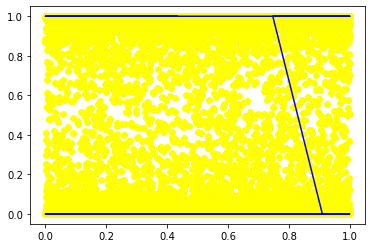

In [14]:
plt.plot(Time,grp_orng['Binary_value'],color='b')
plt.scatter(Time,res.predict(),color='yellow')

In [15]:
x=0
for i , j in zip(grp_orng['pre_binary'],grp_orng['name']):
    if(i!=j):
        
        x+=1
print(x/len(res.predict()))

0.0705


In [16]:
res.model.endog_names


['name[grapefruit]', 'name[orange]']

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
grp_orng.head()


,name,diameter,weight,red,green,blue,Binary_value,pre_binary
0,orange,2.96,86.76,172,85,2,0,orange
1,orange,3.91,88.05,166,78,3,0,orange
2,orange,4.42,95.17,156,81,2,0,orange
3,orange,4.47,95.60,163,81,4,0,orange
4,orange,4.48,95.76,161,72,9,0,orange


<AxesSubplot:xlabel='Binary_value', ylabel='count'>

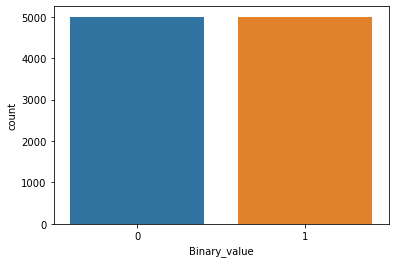

In [19]:
sns.countplot(grp_orng['Binary_value'])

In [20]:
print(confusion_matrix(grp_orng["name"], 
                            grp_orng['pre_binary']))

[[4635  365]
 [ 340 4660]]


<b> sklearn SVM </b>


In [21]:
fruit_data=pd.read_csv('../../data/citrus.csv')

In [22]:
fruit_data.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [23]:
import datacleaner as dc


In [24]:
dc.autoclean(fruit_data)

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,0,15.35,253.89,149,77,20
9996,0,15.41,254.67,148,68,7
9997,0,15.59,256.50,168,82,20
9998,0,15.92,260.14,142,72,11


In [25]:
fruit_data.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [26]:
X=fruit_data[list(fruit_data.columns)[1:]]
y=fruit_data['name']

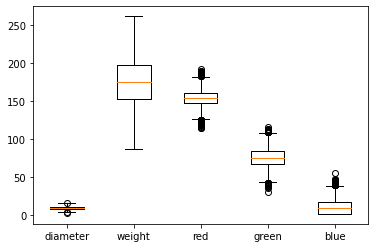

In [27]:
plt.boxplot(X[X.columns],labels=list(X.columns))

plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,
                                                   random_state = 0)

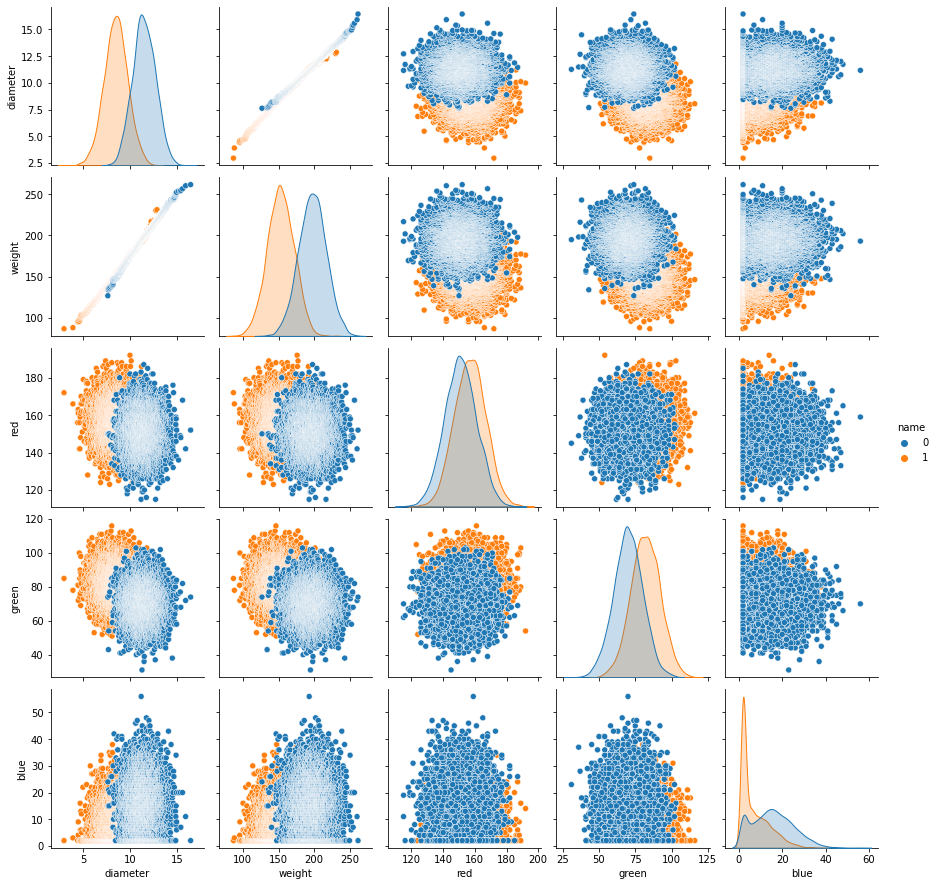

In [29]:
sns.pairplot(fruit_data,hue='name')

<AxesSubplot:>

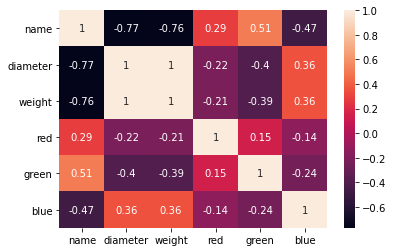

In [30]:
sns.heatmap(fruit_data.corr(),annot=True)

In [31]:
from sklearn.svm import SVC
clf = SVC(C=10).fit(X_train, y_train)

print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of RBF-kernel SVC on training set: 0.93
Accuracy of RBF-kernel SVC on test set: 0.92


In [32]:
y_predict=clf.predict(X_test)
print(confusion_matrix(y_test,y_predict))

[[1522  121]
 [ 131 1526]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1643
           1       0.93      0.92      0.92      1657

    accuracy                           0.92      3300
   macro avg       0.92      0.92      0.92      3300
weighted avg       0.92      0.92      0.92      3300



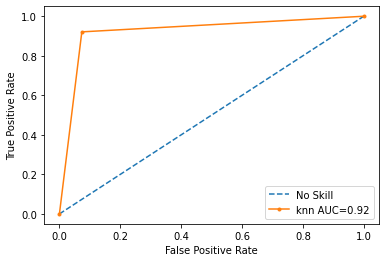

In [34]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds=roc_curve(y_test, y_predict)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


In [62]:
X=fruit_data[list(fruit_data.columns)[1:]]
y=fruit_data['name']

In [69]:
y.value_counts()

1    5000
0    5000
Name: name, dtype: int64

In [63]:
from sklearn.model_selection import  cross_val_score

In [64]:
from sklearn.linear_model import LogisticRegression 

In [68]:
Lg=LogisticRegression()
score=cross_val_score(Lg,X,y,cv=12)
print("mean:="+str(score.mean()),"std :"+str(score.std()))

mean:=0.9249079727814388 std :0.128857435964288


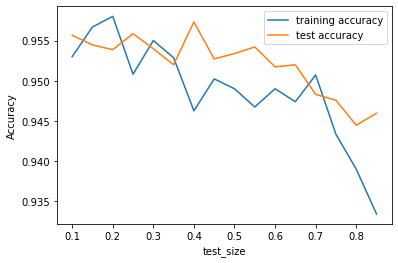

In [66]:
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= np.arange(0.1, 0.9,0.05)
Lg=LogisticRegression()
for i in test_size:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        Lg.fit(X_train, y_train)
        training_accuracy.append(Lg.score(X_test, y_test))
        test_accuracy.append(Lg.score(X_train, y_train))
  

    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
Lg.fit(X_train, y_train)

LogisticRegression()

In [56]:
print('Accuracy of Logistics Regression  on training set: {:.2f}'
     .format(Lg.score(X_train, y_train)))
print('Accuracy of Logistics Regression  test set: {:.2f}'
     .format(Lg.score(X_test, y_test)))

Accuracy of Logistics Regression  on training set: 0.95
Accuracy of Logistics Regression  test set: 0.95


In [57]:
y_predict=Lg.predict(X_test)
z=confusion_matrix(y_test,y_predict)
z

array([[1596,   59],
       [ 101, 1544]], dtype=int64)

In [58]:
m=list(zip(z[:,0],z[:,1]))
m

[(1596, 59), (101, 1544)]

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1655
           1       0.96      0.94      0.95      1645

    accuracy                           0.95      3300
   macro avg       0.95      0.95      0.95      3300
weighted avg       0.95      0.95      0.95      3300



In [60]:
# from statsmodels.graphics.mosaicplot import mosaic

# mosaic(z,gap=0.01)


# plt.show()

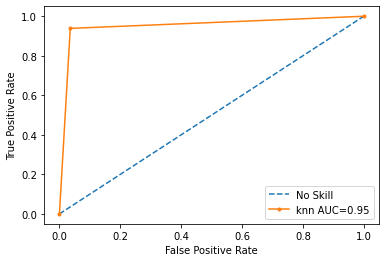

In [61]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds=roc_curve(y_test, y_predict)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# show the plot
plt.show()
